## Logistic Regression

### **Fruit dataset**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


fruit_datafile = '/content/fruit_data_with_colors.txt'
fruit = (pd.read_csv(fruit_datafile,
                     sep='\t')
         [['mass','width','height','color_score',
           'fruit_label',
           'fruit_name','fruit_subtype']])
X_fruits_2d = fruit[['height', 'width']]
y_fruits_2d = fruit['fruit_label']

In [39]:
%matplotlib inline

In [43]:
def plot_fruit_dataset_binary_classifier(C):
    fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
    y_fruits_apple = y_fruits_2d == 1
    X_train, X_test, y_train, y_test = (
    train_test_split(X_fruits_2d.values,
                     y_fruits_apple.values,
                     random_state = 0))
    
    title = 'Logistic regression for binary classification\n\
    Fruit dataset: Apple vs others, C={}'.format(C)

    clf = LogisticRegression(C=C).fit(X_train, y_train)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,  None, title, subaxes)
    print('scores on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
    print('scores on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))                                            
                                             
                                              
                                             

scores on training set: 0.80
scores on test set: 0.73
scores on training set: 0.75
scores on test set: 0.67
scores on training set: 0.66
scores on test set: 0.67


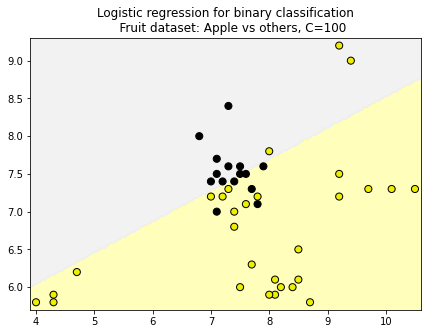

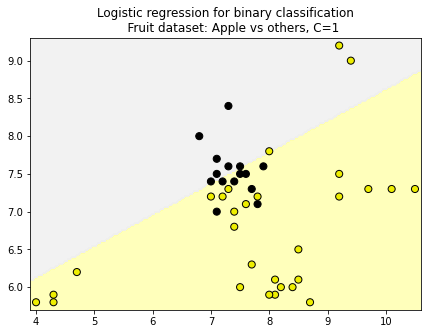

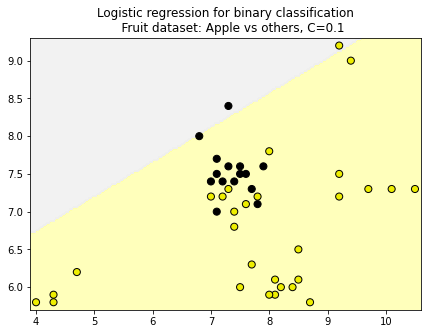

In [44]:
plot_fruit_dataset_binary_classifier(C=100)
plot_fruit_dataset_binary_classifier(C=1)
plot_fruit_dataset_binary_classifier(C=0.1)

In [15]:
def plot_class_regions_for_classifier_subplot(clf, 
                                              X, 
                                              y, 
                                              X_test, 
                                              y_test, 
                                              title, 
                                              subplot, 
                                              target_names = None, 
                                              plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, 
                                   x_max+k, 
                                   h), 
                         np.arange(y_min-k, 
                                      y_max+k, 
                                      h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], 
                    X[:, 1], 
                    c=y, 
                    cmap=cmap_bold, 
                    s=plot_symbol_size, 
                    edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], 
                        X_test[:, 1], 
                        c=y_test, 
                        cmap=cmap_bold, 
                        s=plot_symbol_size, 
                        marker='^', 
                        edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title_append = "\nTrain score = {:.2f},\
                        Test score = {:.2f}".format(train_score, 
                                                    test_score)
        title = title + title_append

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], 
                                   label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

###**Breast Cancer dataset (real dataset)**

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 42)

logreg = LogisticRegression(max_iter=50000).fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

print('=================')
print('C=100')
logreg100 = LogisticRegression(max_iter=50000, C=100).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg100.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg100.score(X_test, y_test)))

print('C=1')
logreg1 = LogisticRegression(max_iter=50000, C=1).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg1.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg1.score(X_test, y_test)))

print('C=0.01')
logreg001 = LogisticRegression(max_iter=50000, C=.001).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg001.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg001.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.97
C=100
Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.97
C=1
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.97
C=0.01
Accuracy of Logistic regression classifier on training set: 0.94
Accuracy of Logistic regression classifier on test set: 0.98


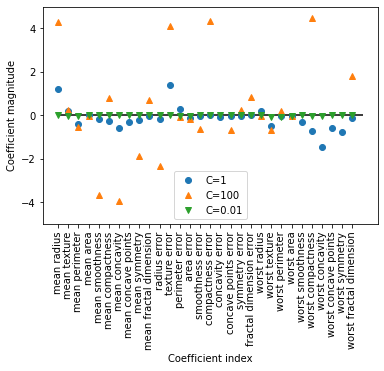

In [81]:
from matplotlib import pyplot as plt

plt.plot(logreg1.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100") 
plt.plot(logreg001.coef_.T, 'v', label="C=0.01") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()
